# Recommender Systems

## Types of recommendation systems
- Demographic Filtering
- Content Filtering
- Collaborative filtering

Demographic Filtering - They offer generalized recommendations to every user, based on popularity and/or genre. The System recommends the same items to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

Content Based Filtering- They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

## Importing Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv('./Dataset/tmdb_5000_credits.csv')
df2=pd.read_csv('./Dataset/tmdb_5000_movies.csv')

In [3]:
print(df1.columns,"\n",df2.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object') 
 Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [5]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Demographic Filtering

challenges while using ratings: since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes

Weighted Rating

WR = ( v / ( v + m ) ) * R + ( m / ( v + m ) ) * C

- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie;
- C is the mean vote across the whole report

In [6]:
C= df2['vote_average'].mean()

In [7]:
print(C)

6.092171559442016


to detemine m: for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.


In [8]:
m= df2['vote_count'].quantile(0.9)

In [9]:
print(m)

1838.4000000000015


filtering movies that qualify for chart

In [10]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]

In [11]:
q_movies.shape

(481, 23)

481 movies qualified for charts, now calculating the weighted ratings

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [14]:
#sorting movies based on score
q_movies = q_movies.sort_values('score',ascending=False)

In [15]:
# printing top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Sorting based on movie popularity

In [16]:
pop=df2.sort_values('popularity',ascending=False)

Text(0, 0.5, 'Popular Movies')

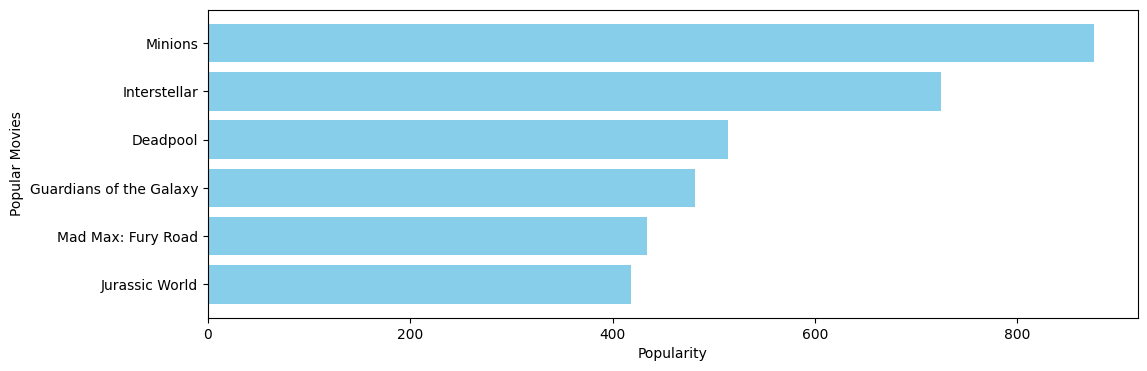

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6),align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.ylabel('Popular Movies')

## Content Based Filtering

**Plot description based Recommender** :- We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset.

### Overview based recommender

In [18]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Computing **Term Frequency-Inverse Document Frequency** :- 

TF -> (term instances/total instances)

IDF -> log(number of documents/documents with term) 

overall importance of a word : TF*IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

# replace NaN with an empty string
df2['overview']=df2['overview'].fillna('')

#Constructing TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df2['overview'])

# shape of matrix
tfidf_matrix.shape

(4803, 20978)

20,978 different words were used to describe the 4803 movies in our dataset.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [20]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

constructing a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [21]:
#Construct a reverse map of indices and movie titles
indices=pd.Series(df2.index,index=df2['title']).drop_duplicates()

Steps to make recommendation
- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [22]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title,cosine_sim=cosine_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices=[i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]
    

In [23]:
get_recommendations('Spectre')

1343    Never Say Never Again
4071    From Russia with Love
3162              Thunderball
1717               Safe Haven
11          Quantum of Solace
4339                   Dr. No
29                    Skyfall
1880              Dance Flick
3336     Diamonds Are Forever
1743                Octopussy
Name: title, dtype: object

### Credits, Genres and Keywords Based Recommender

our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [33]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features=['cast','crew','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)


In [38]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']

    return np.nan

In [39]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x,list):
        names=[i['name'] for i in x]

        if len(names)>3:
            names=names[:3]
        return names
    
    return []

In [40]:
def get_cast(x):
    if isinstance(x,list):
        if len(x)>3:
            x=x[:3]
        return x
    
    return []

In [41]:
df2['director'] = df2['crew'].apply(get_director)
features=['cast','keywords','genres']
for feature in features:
    df2[feature]=df2[feature].apply(get_list)

In [45]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [46]:
# Function to convert all strings to lower case and strip names of spaces
def  clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [47]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [48]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron


Creating our **"metadata soup"**, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [49]:
def create_soup(x):
    return ' '.join(x['keywords'])+' '+' '.join(x['cast'])+' '+x['director']+' '+' '.join(x['genres'])

In [50]:
df2['soup']=df2.apply(create_soup,axis=1)

One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count=CountVectorizer(stop_words='english')
count_matrix=count.fit_transform(df2['soup'])

In [54]:
count_matrix.shape

(4803, 11520)

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2=cosine_similarity(count_matrix,count_matrix)

In [58]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2=df2.reset_index()
indices=pd.Series(df2.index,index=df2['title'])

In [59]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

to increase the weight of the feature, we can add the feature multiple times in the soup.

## Collaborative Filtering

the problem with content based filtering is that it is not capable of capturing tastes and providing recommendations across genres.

it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is. Therefore we use collaborative filtering

**It is basically of two types:-**

- **User based filtering** : These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. Assume each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target. Based on Pearson Correlation, we can compute the similarity.                                                                            
Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

- **Item Based Collaborative Filtering** : Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated.Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. The following table shows how to do so for the movie Me Before You.

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. First, the main issue is scalability. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, sparsity is another concern.

In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.

### Single Value Decomposition (Model based approach)

to handle scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

**Latent Factor** is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.

In [ ]:
%pip install --upgrade scikit-surprise

In [1]:
import pandas as pd

In [2]:
ratings=pd.read_csv("./UserInteractionDataset/ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [11]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [9]:
reader=Reader(line_format='user item rating')
data=Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']],reader)

In [18]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8971  0.8933  0.8994  0.8966  0.8969  0.8967  0.0020  
MAE (testset)     0.6950  0.6880  0.6887  0.6884  0.6909  0.6902  0.0026  
Fit time          0.80    0.80    0.82    0.80    0.81    0.80    0.01    
Test time         0.07    0.07    0.14    0.07    0.16    0.10    0.04    


{'test_rmse': array([0.89711516, 0.89333518, 0.89944371, 0.8965576 , 0.89693225]),
 'test_mae': array([0.69496829, 0.68796196, 0.68874376, 0.68839047, 0.69091263]),
 'fit_time': (0.7994072437286377,
  0.7993793487548828,
  0.8236920833587646,
  0.7961819171905518,
  0.80605149269104),
 'test_time': (0.0670003890991211,
  0.06846380233764648,
  0.1429445743560791,
  0.06764888763427734,
  0.15628981590270996)}

In [19]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [20]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [21]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7711751156728797, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.618. One startling feature of this recommender system is that it doesn't care what the movie is. It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

### Memory Based Approach (item-item recommendation)

In [22]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [23]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']],reader)

In [24]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [25]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [26]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [ ]:
test_pred

In [28]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9505


0.9505303474081043

### Correlation using SVD

In [44]:
import numpy as np

In [38]:
ratings_matrix=ratings[['userId', 'movieId', 'rating']]
ratings_matrix=ratings_matrix.pivot_table(values='rating',index='userId',columns='movieId',fill_value=0)
ratings_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
ratings_matrix.shape

(671, 9066)

In [40]:
X = ratings_matrix.T
X.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X.shape

(9066, 671)

In [42]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(9066, 10)

In [45]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(9066, 9066)

In [46]:
X.index[75]

81

Index # of product ID purchased by customer

In [47]:
i = 81

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [59]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(9066,)

In [61]:
Recommend = list(X.index[correlation_product_ID > 0.65]).sort(reverse=True)

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

[1, 2, 3, 5, 6, 9, 16, 18, 19, 21]

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.